In [2]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

## Load all data

In [3]:
meta = pd.read_csv("data/meta.csv")


In [4]:
valid_data = meta.loc[meta["edges"]>0,:]

In [5]:
def get_modularity_from_edgelist(edge_df:pd.DataFrame):
    G = nx.from_pandas_edgelist(edge_df,"from","to")
    return nx.community.modularity(G,nx.community.louvain_communities(G,seed=420))

In [6]:
modularity_values = []
for id in tqdm(valid_data["id"]):
    #print(id)
    temp_edgelist = pd.read_csv("data/{}/edges.csv".format(id))
    modularity_values.append(get_modularity_from_edgelist(temp_edgelist))



  0%|          | 0/133 [00:00<?, ?it/s]

100%|██████████| 133/133 [00:06<00:00, 19.36it/s] 


In [7]:
valid_data["modularity"] = modularity_values

C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\3473303209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["modularity"] = modularity_values


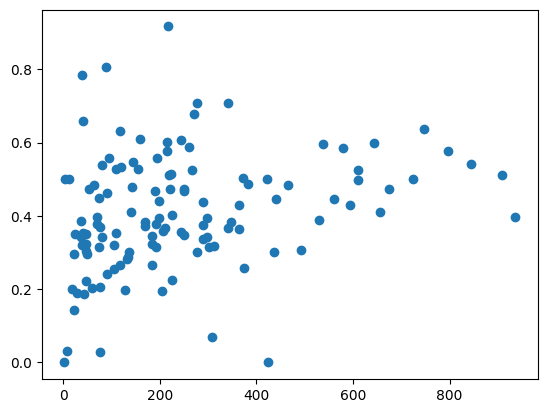

In [8]:
plt.scatter(valid_data.loc[valid_data["nodes"]<1000,"nodes"],
            valid_data.loc[valid_data["nodes"]<1000,"modularity"])

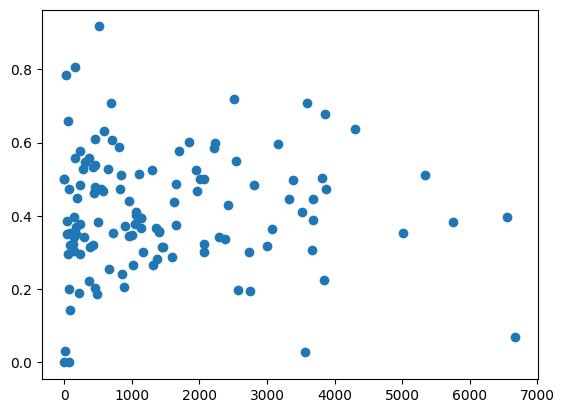

In [9]:
plt.scatter(valid_data.loc[valid_data["edges"]<8000,"edges"],
            valid_data.loc[valid_data["edges"]<8000,"modularity"])

In [10]:
valid_data.loc[valid_data["nodes"]>1000]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity
0,walkingdead,5942.0,72746.0,29,The Walking Dead,8.1,1069183,Walking Dead Wiki,tv,10K,100K,1K,0.652640
1,simpsons,5410.0,30943.0,52,The Simpsons,8.7,432296,Simpsons Wiki,tv,20K,100K,1K,0.612733
2,arrow,3681.0,28806.0,20,The Flash,7.5,366576,Arrowverse Wiki,tv,10K,20K,2K,0.638665
3,greysanatomy,3457.0,13554.0,27,Happy Valley,8.5,63294,Grey's Anatomy Universe Wiki,tv,10K,40K,2K,0.577096
4,24,3180.0,73590.0,1,24,8.4,195824,Wiki 24,tv,9K,10K,10,0.419688
5,supernatural,2634.0,28951.0,50,Paranormal,8.0,74176,Supernatural Wiki,tv,5K,10K,400,0.397708
6,southpark,2455.0,154953.0,63,South Park,8.7,402704,South Park Archives,tv,6K,50K,500,0.594021
7,bones,1720.0,2509.0,35,Bones,7.8,174271,Bones Wiki,tv,2K,5K,700,0.719678
8,house,1513.0,5005.0,33,House,8.7,503036,House Wiki,tv,6K,1K,300,0.352144
9,familyguy,1321.0,2541.0,8,Family Guy,8.2,361387,Family Guy Wiki,tv,7K,9K,10,0.549802


(array([ 2.,  2., 11.,  6., 22., 31., 21., 28.,  7.,  3.]),
 array([6.8 , 7.07, 7.34, 7.61, 7.88, 8.15, 8.42, 8.69, 8.96, 9.23, 9.5 ]),
 <BarContainer object of 10 artists>)

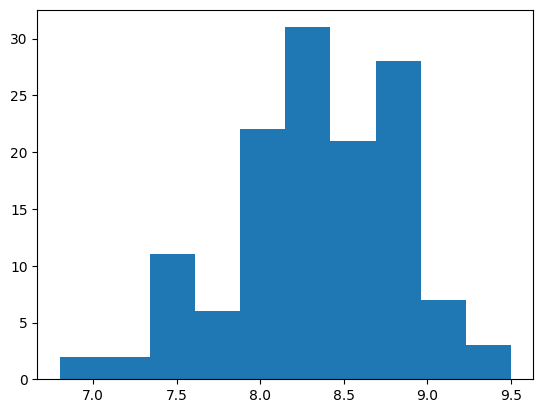

In [11]:
plt.hist(valid_data["imdb-score"])

In [26]:
valid_data["imdb-score"].quantile([0.33,0.67])

0.33    8.2
0.67    8.6
Name: imdb-score, dtype: float64

In [27]:
bins = [6.8, 8.3, 8.6, 9.8 ]
labels = ['below 8', 'between 8 and 9', 'above 9']
valid_data['score_cat'] = pd.cut(valid_data['imdb-score'], bins=bins, labels=labels)

C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\3738979140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['score_cat'] = pd.cut(valid_data['imdb-score'], bins=bins, labels=labels)


C:\Users\tomi\AppData\Local\Temp\ipykernel_14232\3079253333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (valid_data["nodes"]>0)].groupby('score_cat')


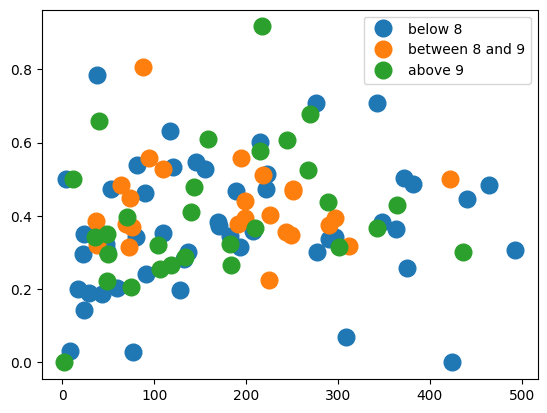

In [35]:
groups = valid_data.loc[(valid_data["nodes"]<500) & 
                        (valid_data["nodes"]>0)].groupby('score_cat')
for name, group in groups:
    plt.plot(group.nodes, group.modularity, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

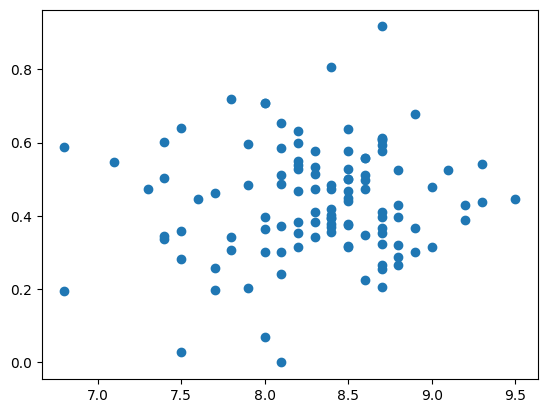

In [36]:
plt.scatter(valid_data.loc[valid_data["nodes"]>50,"imdb-score"],
            valid_data.loc[valid_data["nodes"]>50,"modularity"])

(array([42., 21., 27., 14.,  7.,  4.,  6.,  3.,  1.,  3.]),
 array([  1. ,  94.5, 188. , 281.5, 375. , 468.5, 562. , 655.5, 749. ,
        842.5, 936. ]),
 <BarContainer object of 10 artists>)

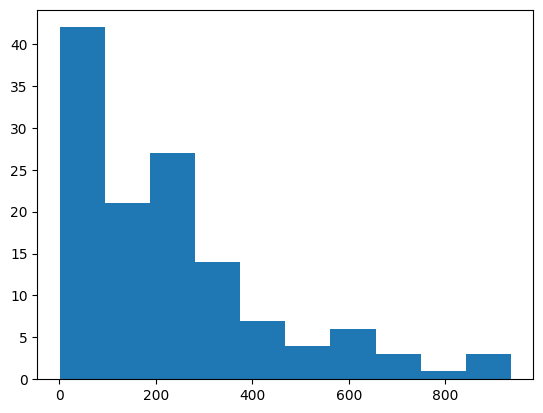

In [38]:
plt.hist(meta.loc[meta["nodes"]<1000,"nodes"])

## Other idea

In [42]:
valid_data.loc[valid_data["id"] == "black-mirror",:]

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,modularity,score_cat
63,black-mirror,217.0,513.0,11,Black Mirror,8.7,631229,Black Mirror Wiki,tv,400,600,10,0.917006,above 9


#### Check series-actor bipartite network
- Load actors / whatever they are called in a dictionary
- Create bipartite matrix